### Load the dataset into a Pandas dataframe.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 

### Split the dataset into features and target variables.

In [55]:
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [56]:
X.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [58]:
X.isna().sum()
## As there is no missing value no need to imputation

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [59]:
y.isna().sum()

class    0
dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
y_train.isna().sum()

class    0
dtype: int64

In [64]:
X_train

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495


In [66]:
scaler = StandardScaler()

In [67]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Implement PCA on the preprocessed dataset using the scikit-learn library.

In [68]:
from sklearn.decomposition import PCA 

In [69]:
model = PCA(n_components=2)

In [70]:
X_train = model.fit_transform(scaled_X_train)
X_test = model.transform(scaled_X_test)

In [72]:
len(X_train)

124

In [73]:
len(y_train)

124

In [28]:
model.explained_variance_ratio_

array([0.36196226, 0.18763862])

In [30]:
model

PCA(n_components=2)

### Determine the optimal number of principal components to retain based on the explained variance ratio.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
explained_variance_ratio = model.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Choose a threshold (e.g., 95% of variance)
threshold = 0.95

# Find the optimal number of components
optimal_num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Optimal number of components: {optimal_num_components}')

Optimal number of components: 1


In [79]:
y_train['class']

138    3
104    2
78     2
36     1
93     2
      ..
71     2
106    2
14     1
92     2
102    2
Name: class, Length: 124, dtype: int64

### Visualise the results of PCA using a scatter plot.

C:\Users\Suraj Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


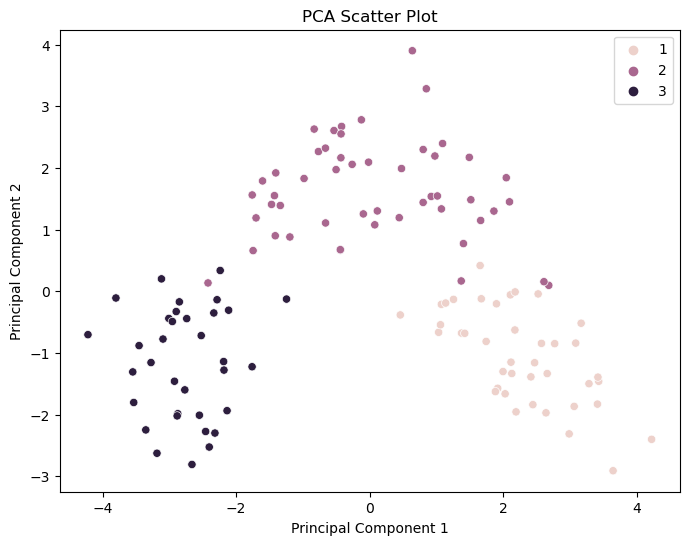

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue=y_train['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend()
# Add a colorbar to show the class labels

plt.show()

### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [99]:
from sklearn.cluster import KMeans

In [103]:
k_means = KMeans(n_clusters=3,random_state=42 )

In [104]:
k_means.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [106]:
cluster_labels = k_means.labels_

### Interpret the results of PCA and clustering analysis.

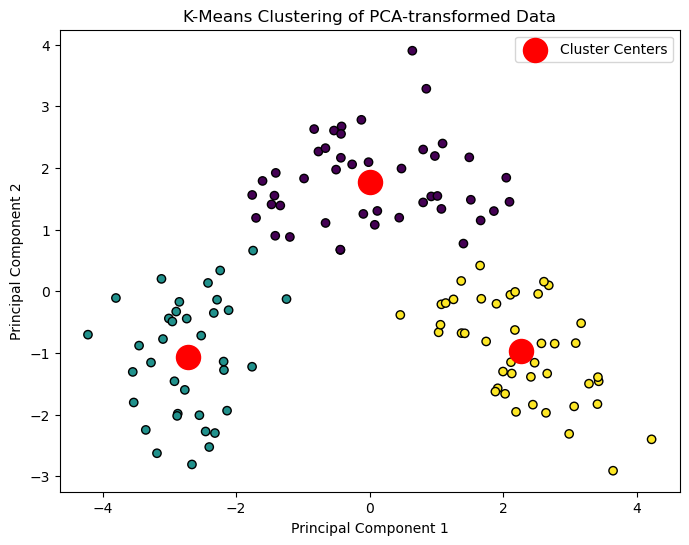

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of PCA-transformed Data')
plt.legend()
plt.show()